# 4. Etude sur Binary AlphaDigit

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import string

import matplotlib.pyplot as plt

from m2ds_deep_learning_2_project.utils import DBN, RBM, lire_alpha_digit, plot_grid

ALL_CHARS = list(string.ascii_uppercase + string.digits)

LISTE_1 = ["A"]
LISTE_2 = ["A", "F"]
LISTE_4 = ["A", "F", "Y", "9"]
LISTE_6 = ["A", "F", "Y", "9", "D", "4"]
LISTE_8 = ["A", "F", "Y", "9", "D", "4", "H", "C"]

## 4.1. RBM

In [3]:
def experiment_RBM(*chars):
    print(chars)
    X = lire_alpha_digit(*chars)
    image_size = (20, 16)
    plot_grid(X, image_size=image_size)

    Q_LIST = [2, 5, 10, 50, 100, 500, 1000]
    HISTORY_LIST = []
    for q in Q_LIST:
        hparams = {
            "p": 320,
            "q": q,
            "n_epochs": 500,
            "learning_rate": 0.1,
            "batch_size": 10,
        }

        rbm = RBM(hparams["p"], hparams["q"])

        error_history = rbm.train(
            X,
            n_epochs=hparams["n_epochs"],
            learning_rate=hparams["learning_rate"],
            batch_size=hparams["batch_size"],
            plot=False,
        )
        HISTORY_LIST.append(error_history)

        Y = rbm.generer_image(20, 10)
        plot_grid(Y, image_size=image_size)

    for i, q in enumerate(Q_LIST):
        plt.plot(HISTORY_LIST[i], label=f"q={q}")
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.show()

('A',)


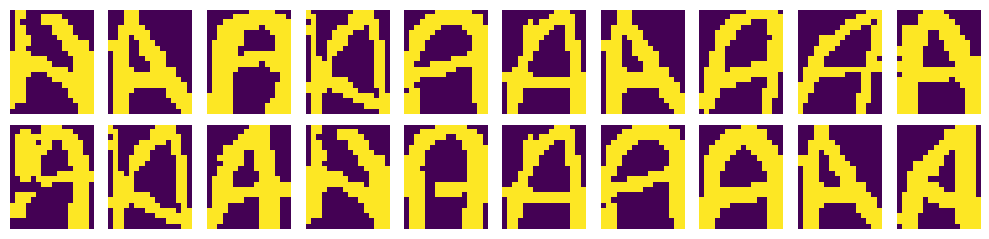

  0%|          | 0/500 [00:00<?, ?it/s]

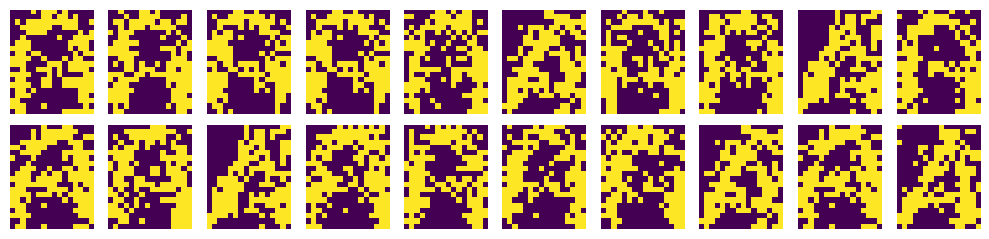

  0%|          | 0/500 [00:00<?, ?it/s]

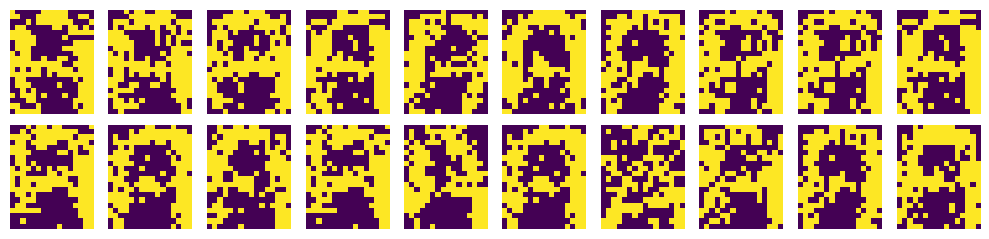

  0%|          | 0/500 [00:00<?, ?it/s]

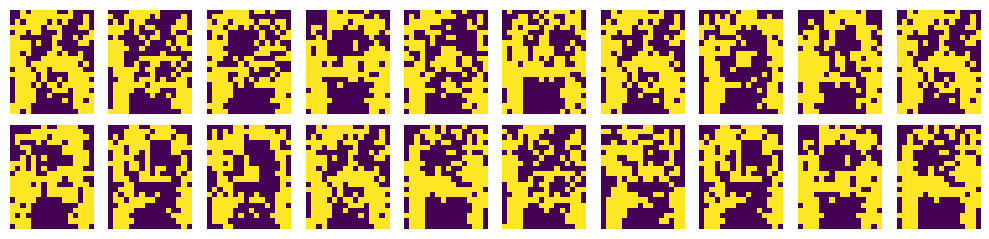

  0%|          | 0/500 [00:00<?, ?it/s]

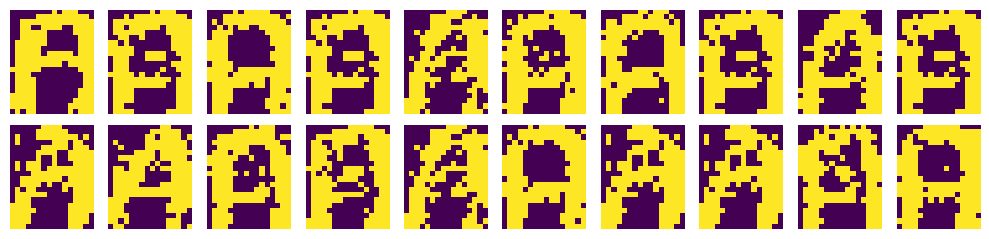

  0%|          | 0/500 [00:00<?, ?it/s]

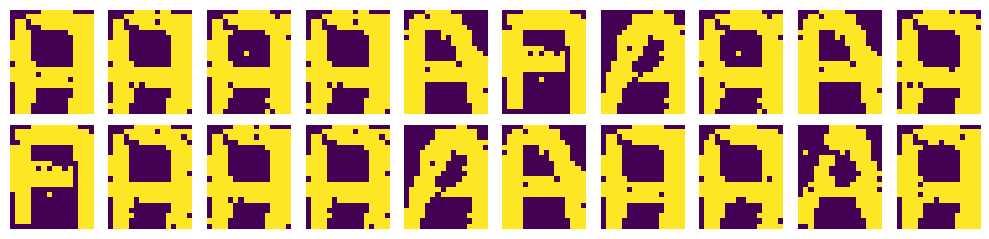

  0%|          | 0/500 [00:00<?, ?it/s]

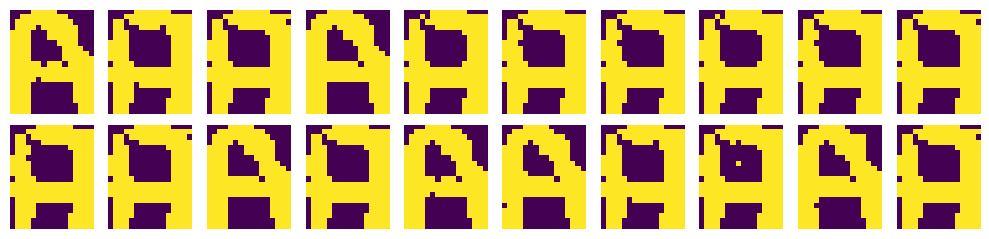

  0%|          | 0/500 [00:00<?, ?it/s]

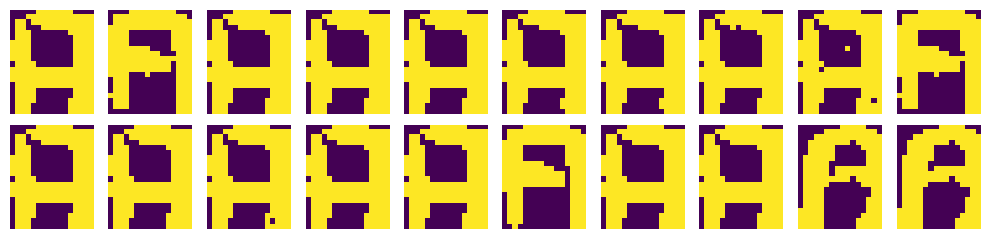

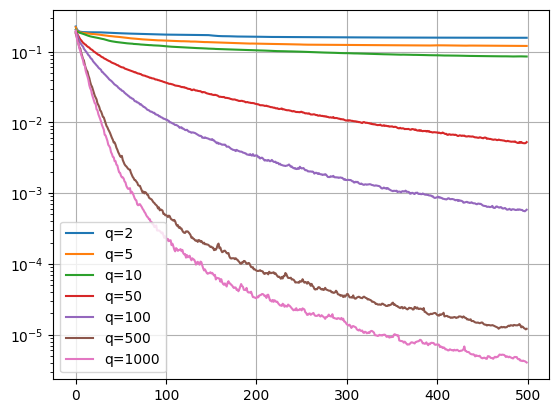

In [4]:
experiment_RBM(*LISTE_1)

('A', 'F')


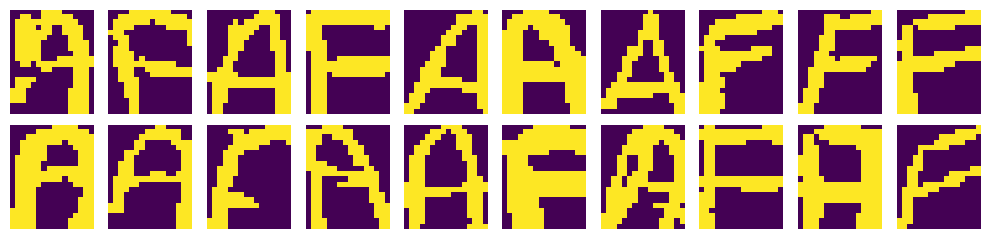

  0%|          | 0/500 [00:00<?, ?it/s]

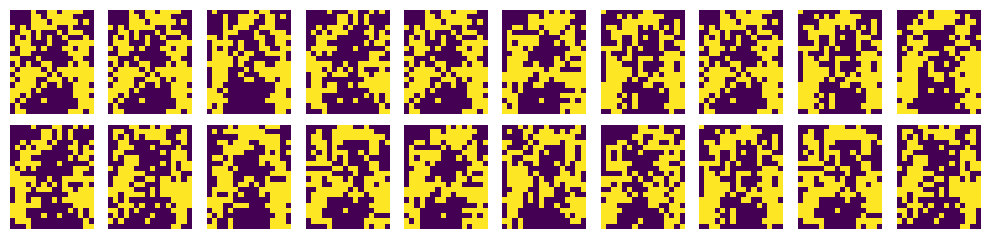

  0%|          | 0/500 [00:00<?, ?it/s]

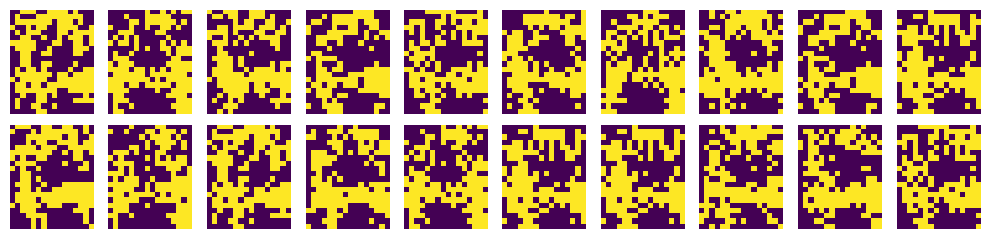

  0%|          | 0/500 [00:00<?, ?it/s]

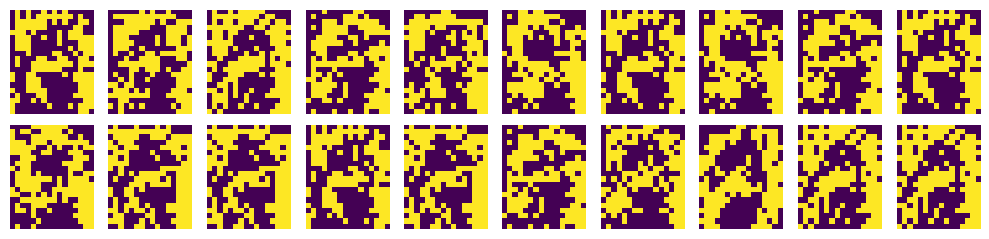

  0%|          | 0/500 [00:00<?, ?it/s]

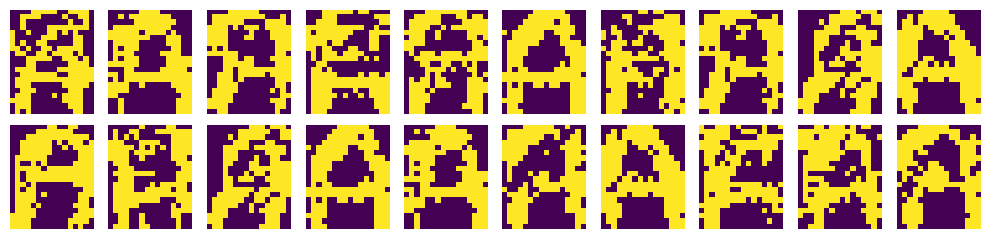

  0%|          | 0/500 [00:00<?, ?it/s]

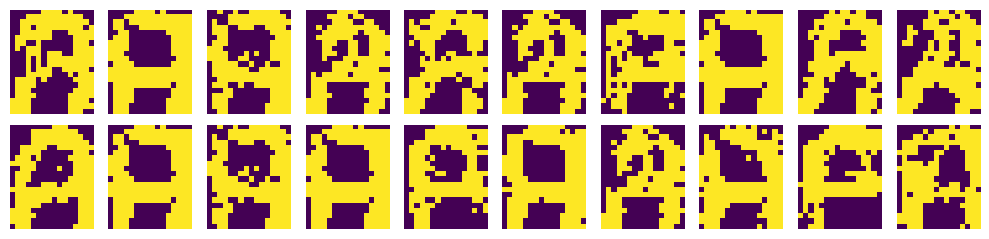

  0%|          | 0/500 [00:00<?, ?it/s]

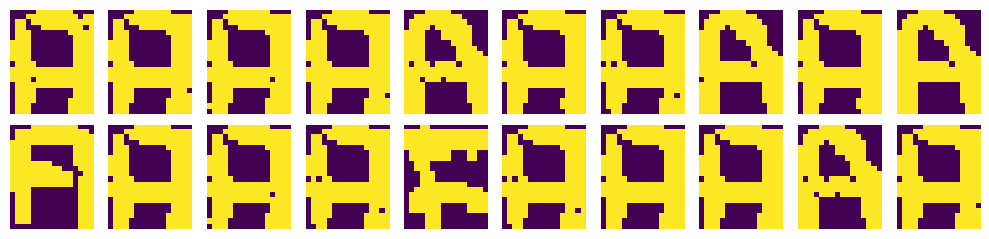

  0%|          | 0/500 [00:00<?, ?it/s]

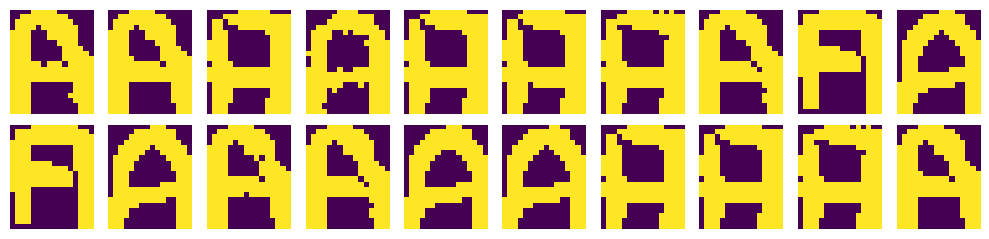

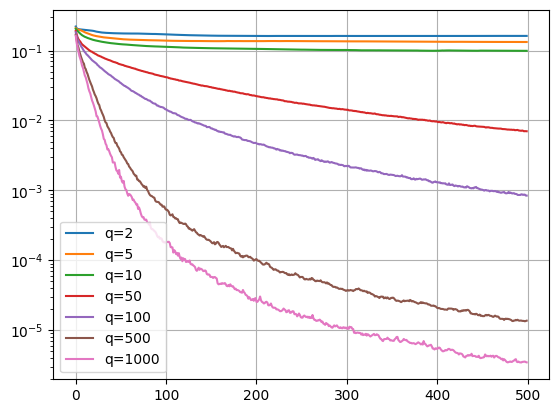

In [10]:
experiment_RBM(*LISTE_2)

('A', 'F', 'Y', '9')


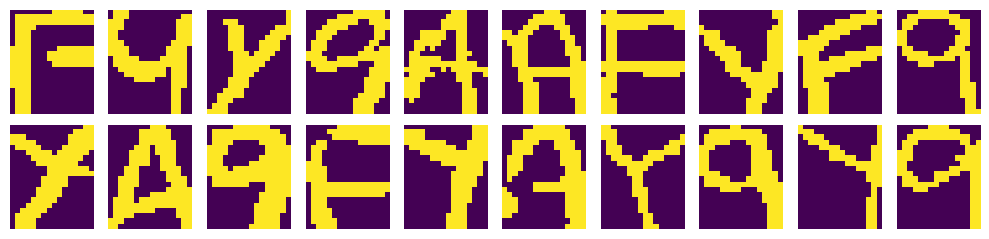

  0%|          | 0/500 [00:00<?, ?it/s]

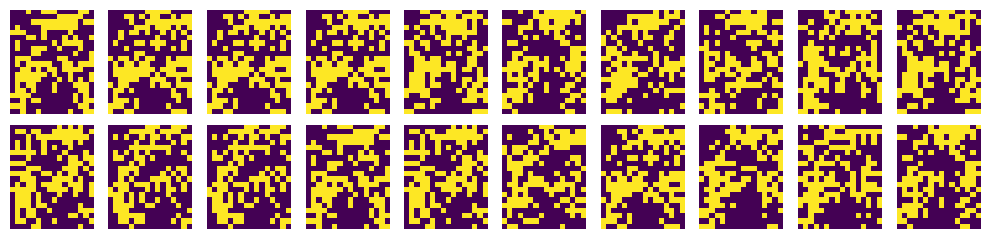

  0%|          | 0/500 [00:00<?, ?it/s]

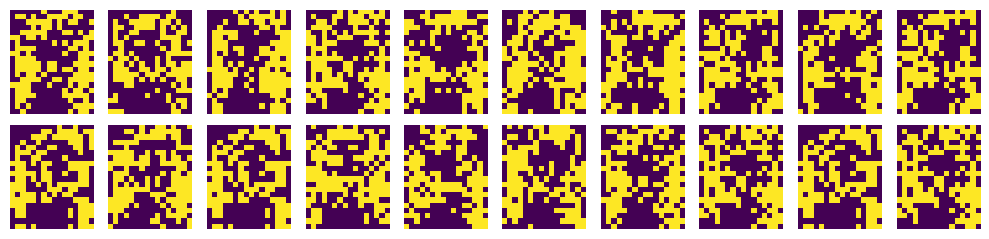

  0%|          | 0/500 [00:00<?, ?it/s]

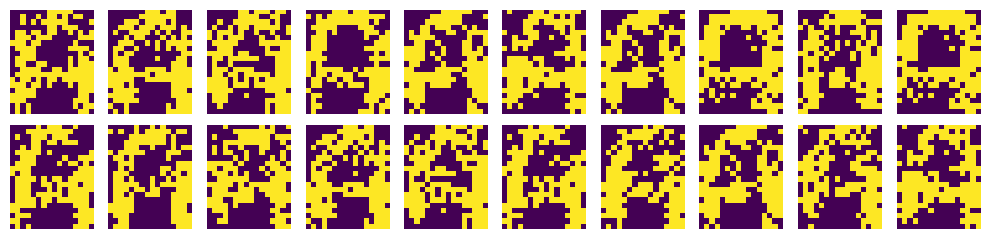

  0%|          | 0/500 [00:00<?, ?it/s]

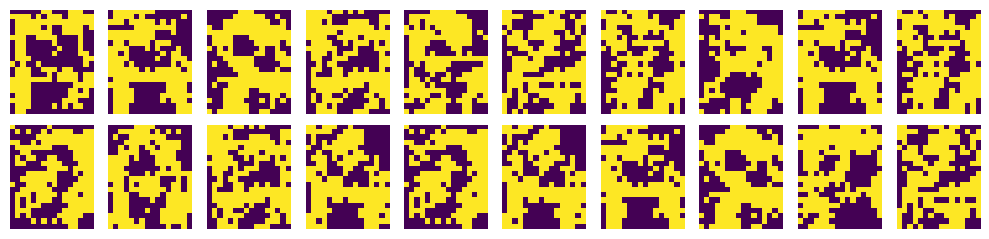

  0%|          | 0/500 [00:00<?, ?it/s]

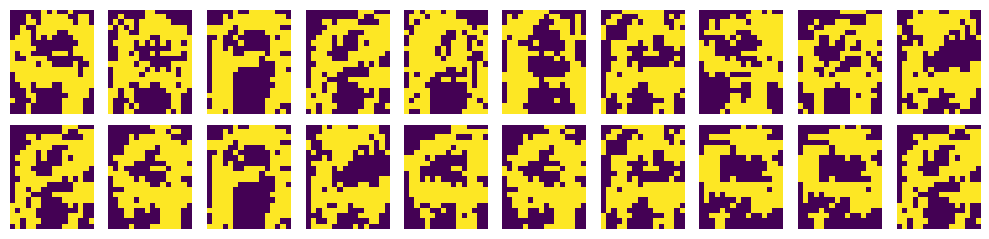

  0%|          | 0/500 [00:00<?, ?it/s]

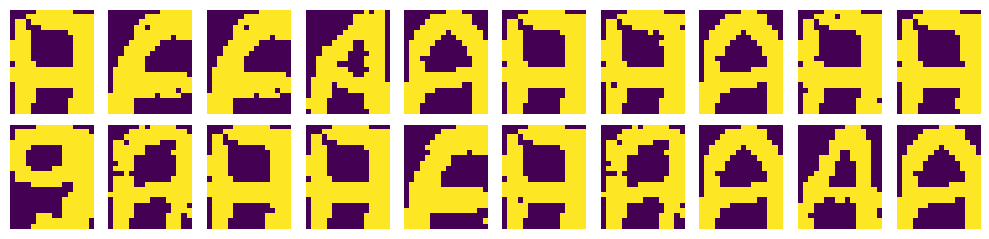

  0%|          | 0/500 [00:00<?, ?it/s]

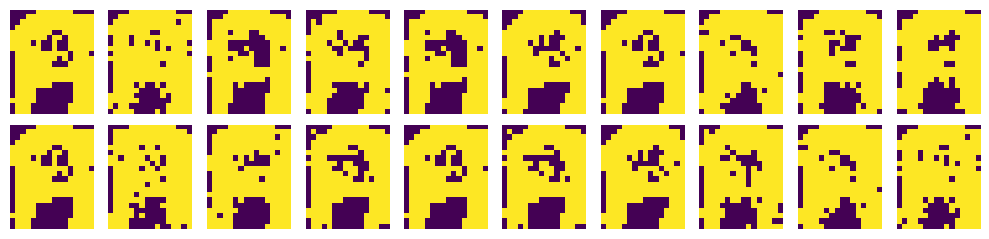

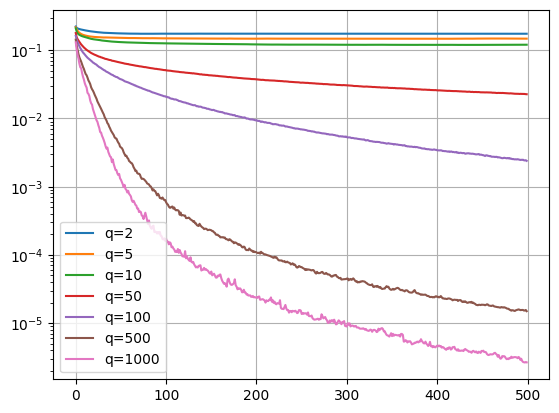

In [6]:
experiment_RBM(*LISTE_4)

('A', 'F', 'Y', '9', 'D', '4')


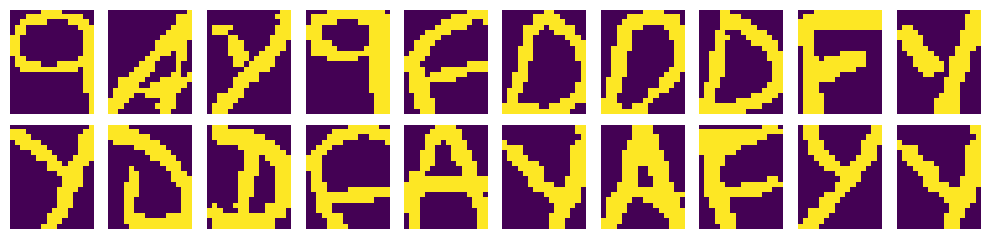

  0%|          | 0/500 [00:00<?, ?it/s]

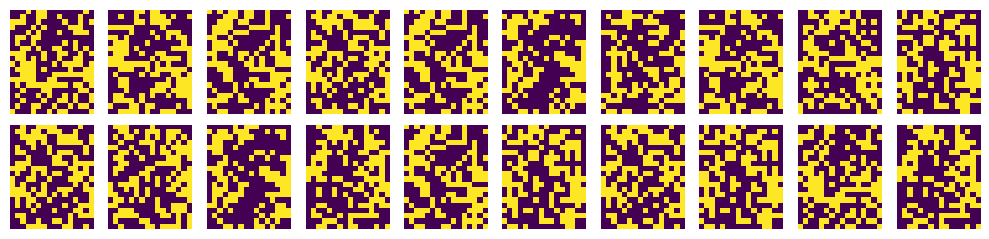

  0%|          | 0/500 [00:00<?, ?it/s]

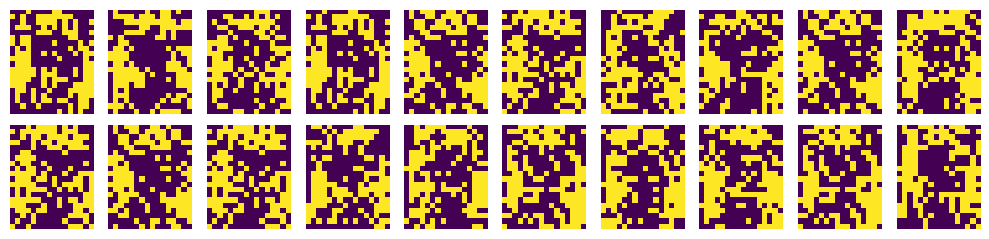

  0%|          | 0/500 [00:00<?, ?it/s]

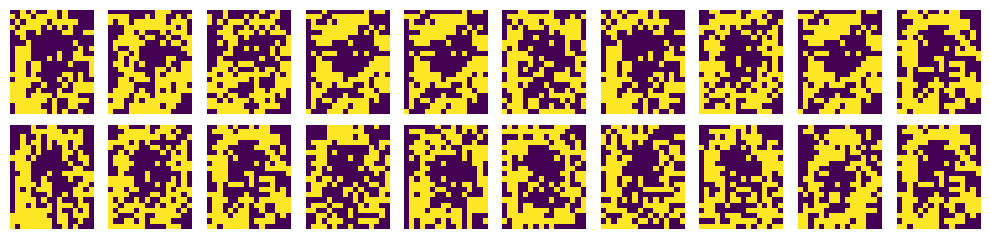

  0%|          | 0/500 [00:00<?, ?it/s]

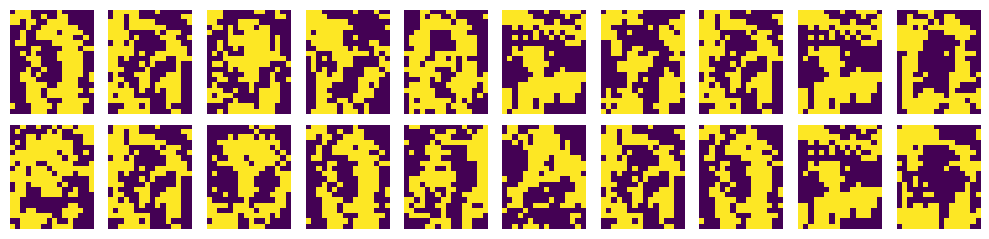

  0%|          | 0/500 [00:00<?, ?it/s]

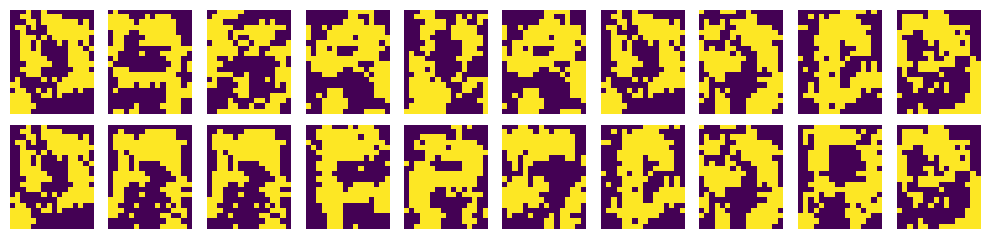

  0%|          | 0/500 [00:00<?, ?it/s]

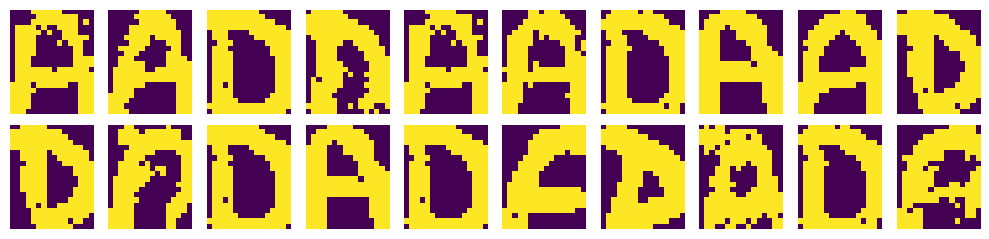

  0%|          | 0/500 [00:00<?, ?it/s]

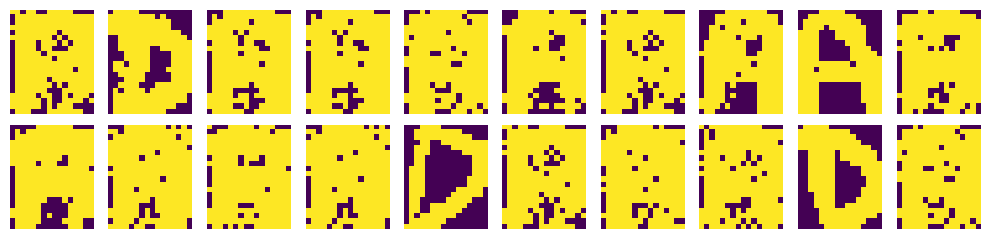

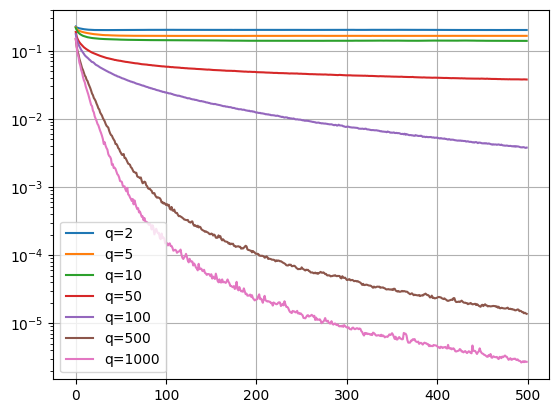

In [11]:
experiment_RBM(*LISTE_6)

## 4.2. DBN

In [12]:
def experiment_DBN(*chars, n_neurons):
    print(chars)
    X = lire_alpha_digit(*chars)
    image_size = (20, 16)
    plot_grid(X, image_size=image_size)

    CONFIG_LIST = [
        [[320, n_neurons], [n_neurons, n_neurons]],
        [[320, n_neurons], [n_neurons, n_neurons], [n_neurons, n_neurons]],
        [
            [320, n_neurons],
            [n_neurons, n_neurons],
            [n_neurons, n_neurons],
            [n_neurons, n_neurons],
        ],
        [
            [320, n_neurons],
            [n_neurons, n_neurons],
            [n_neurons, n_neurons],
            [n_neurons, n_neurons],
            [n_neurons, n_neurons],
        ],
    ]
    HISTORY_LIST = []
    for config in CONFIG_LIST:
        hparams = {
            "config": config,
            "n_epochs": 500,
            "learning_rate": 0.1,
            "batch_size": 10,
        }

        dbn = DBN(hparams["config"])

        error_history = dbn.train(
            X,
            n_epochs=hparams["n_epochs"],
            learning_rate=hparams["learning_rate"],
            batch_size=hparams["batch_size"],
            plot=False,
        )
        HISTORY_LIST.append(error_history)

        Y = dbn.generer_image(20, 10)
        plot_grid(Y, image_size=image_size)

    for i, config in enumerate(CONFIG_LIST):
        for j in range(len(HISTORY_LIST[i])):
            plt.plot(HISTORY_LIST[i][j], label=f"config={config} dbn{j}")
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.show()

('A',)


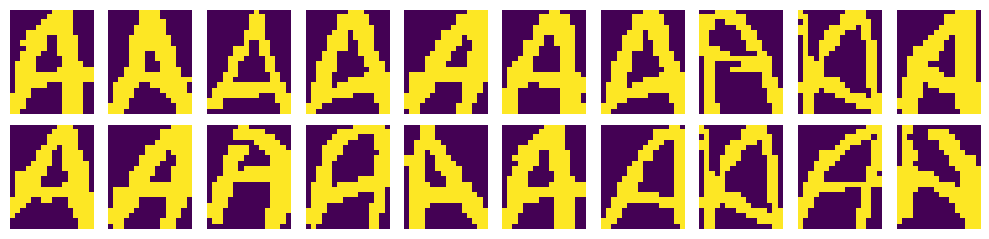

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

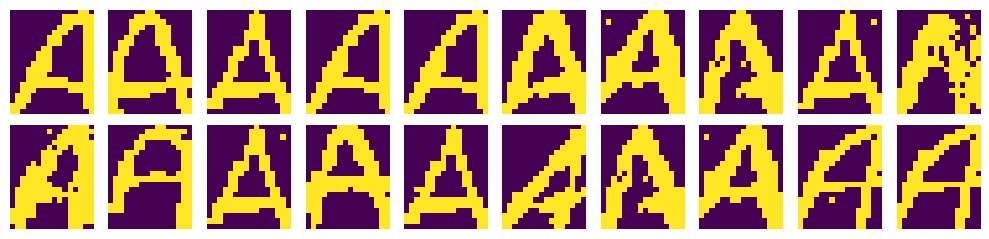

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

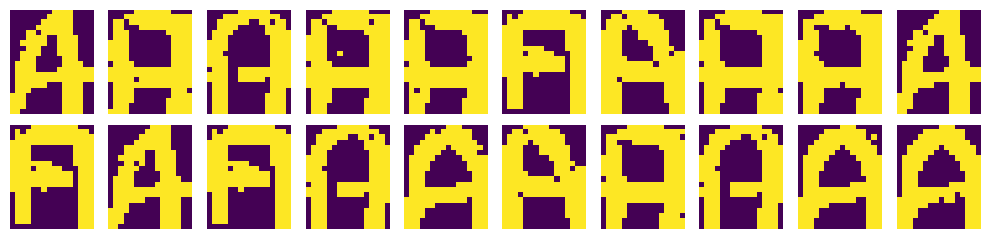

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

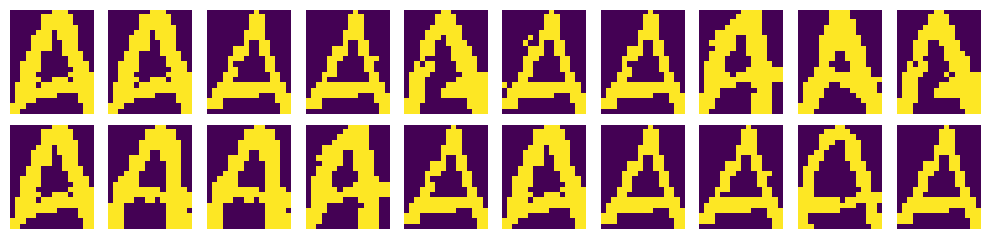

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

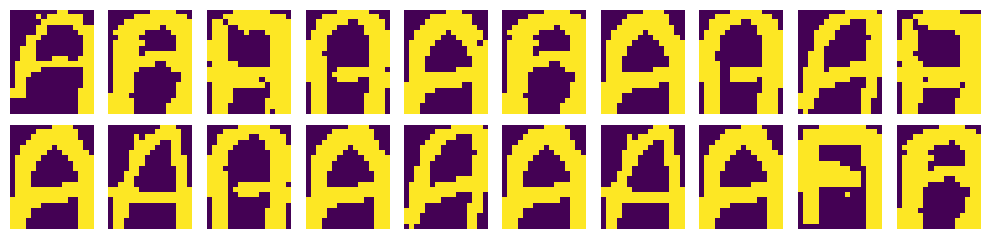

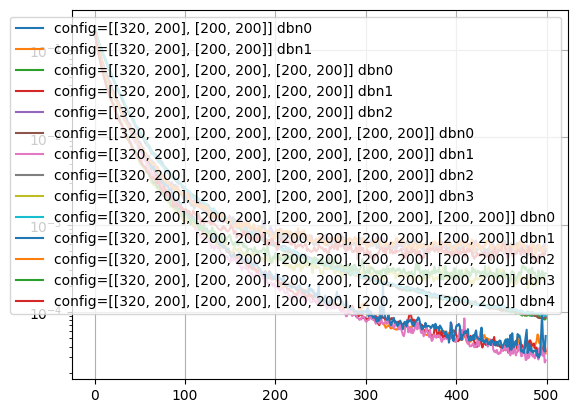

In [13]:
experiment_DBN(*LISTE_1, n_neurons=200)

('A',)


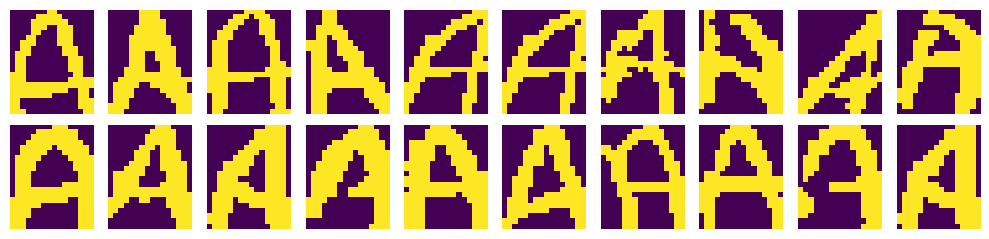

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

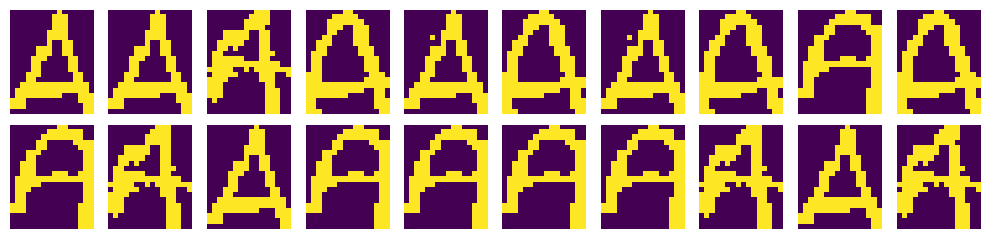

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

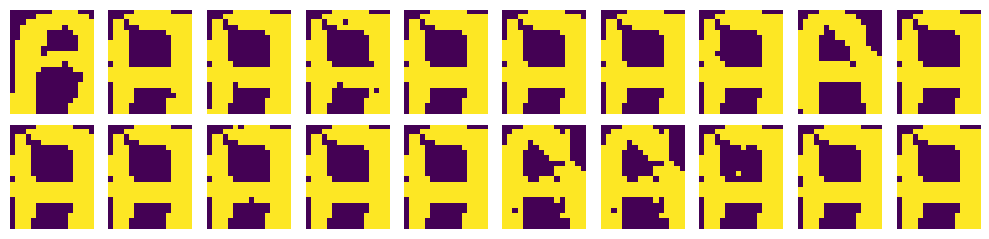

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

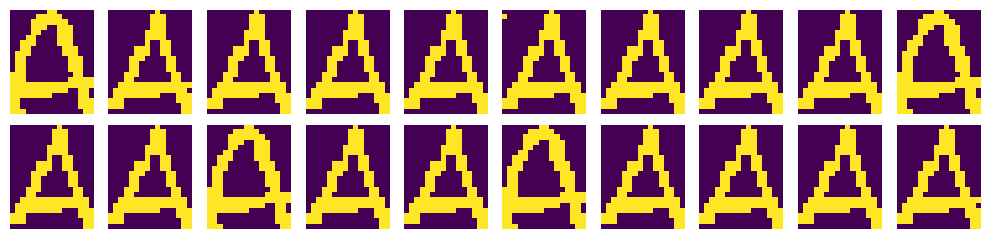

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

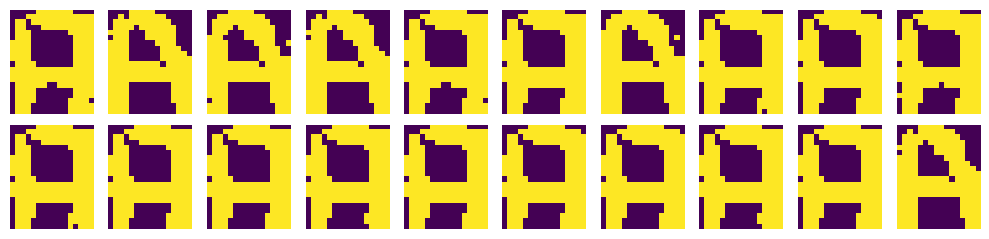

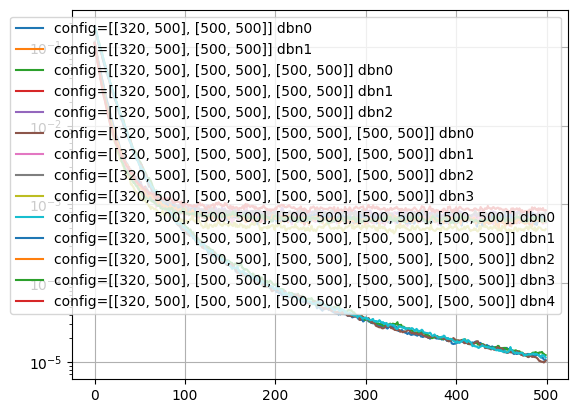

In [14]:
experiment_DBN(*LISTE_1, n_neurons=500)

('A', 'F')


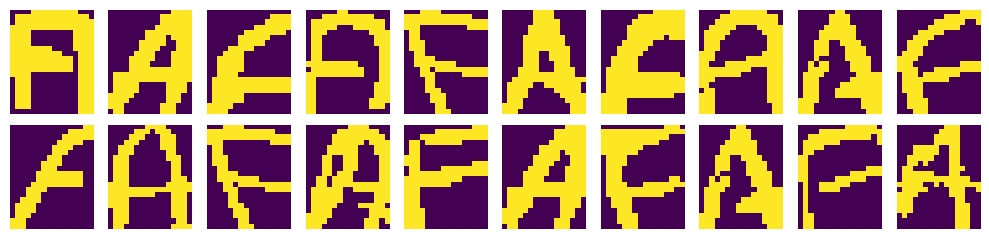

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

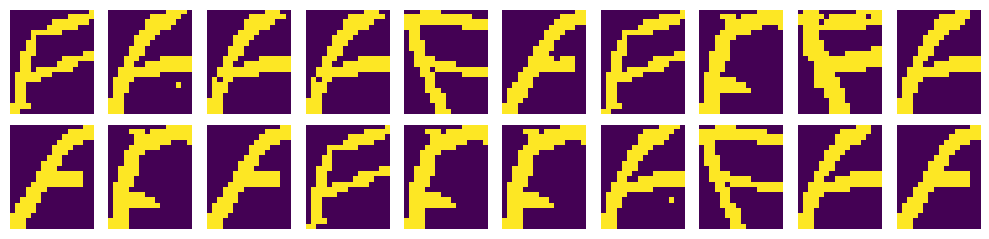

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

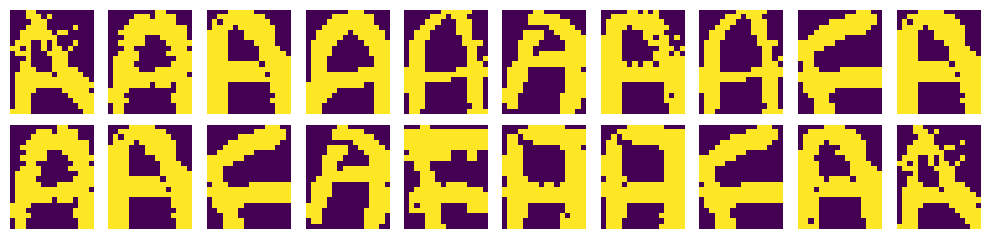

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

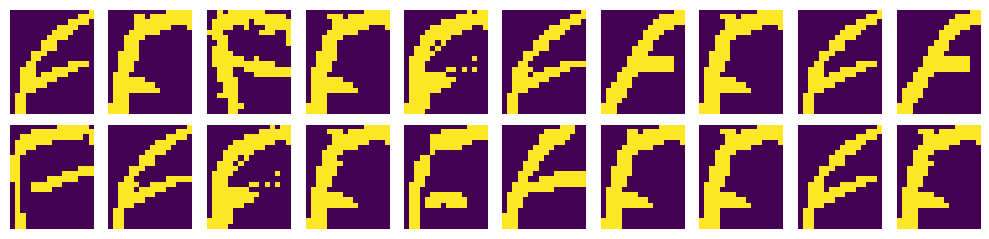

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

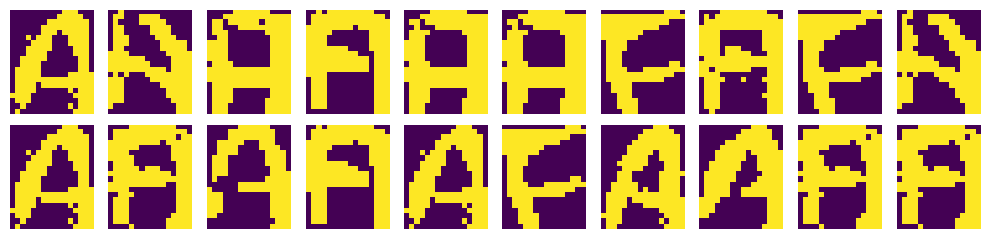

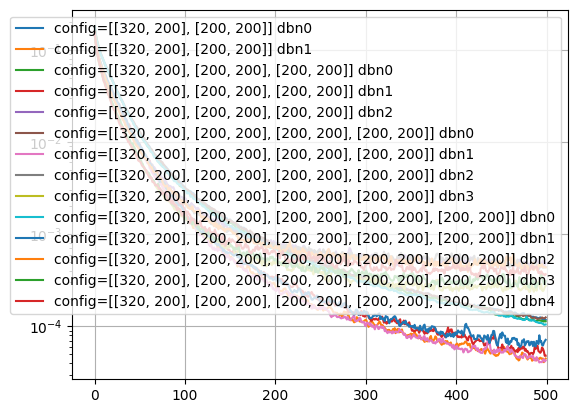

In [15]:
experiment_DBN(*LISTE_2, n_neurons=200)

('A', 'F')


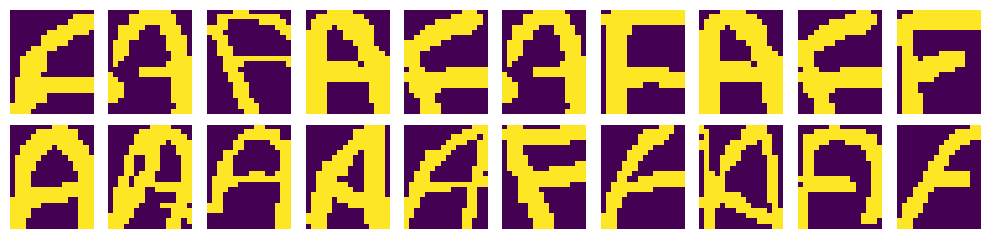

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

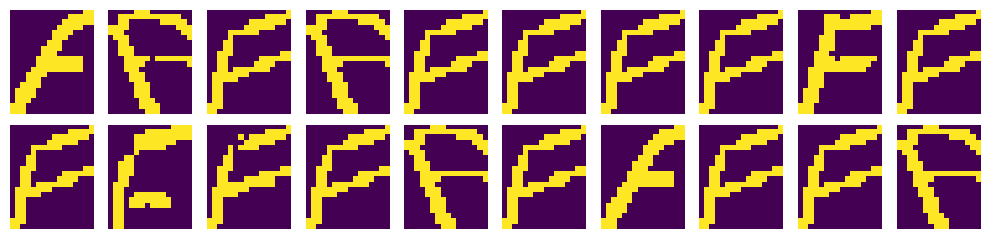

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

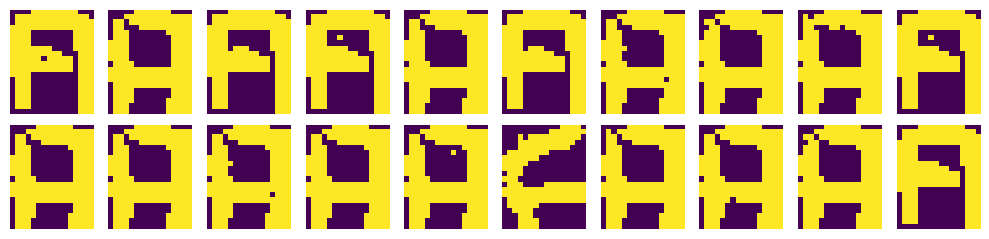

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

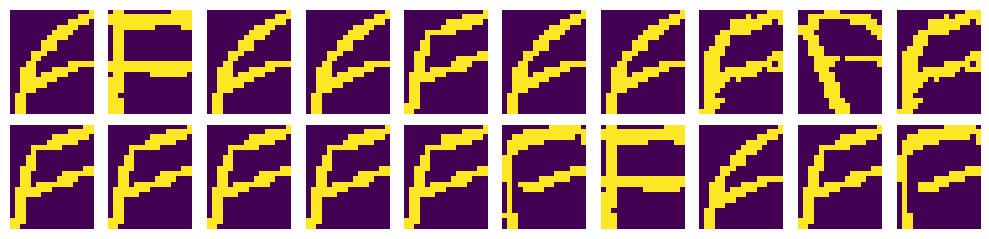

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

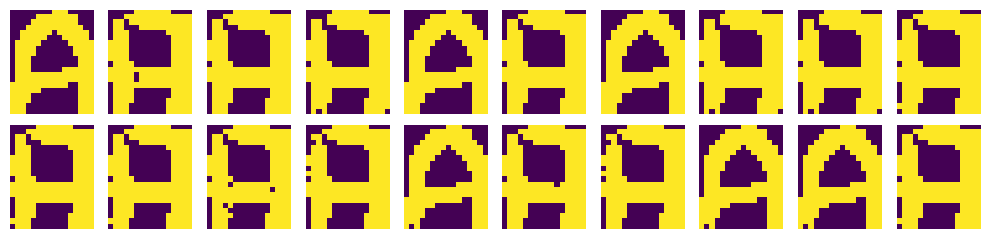

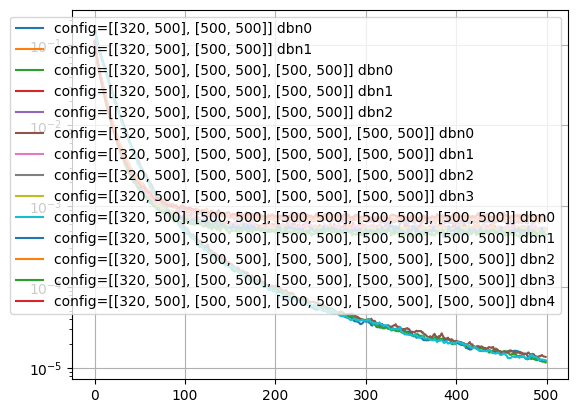

In [16]:
experiment_DBN(*LISTE_2, n_neurons=500)

('A', 'F')


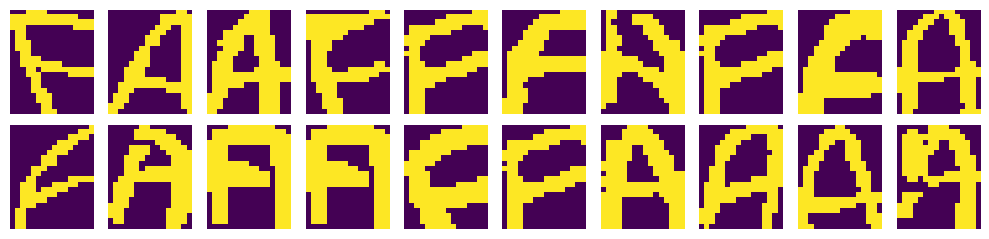

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

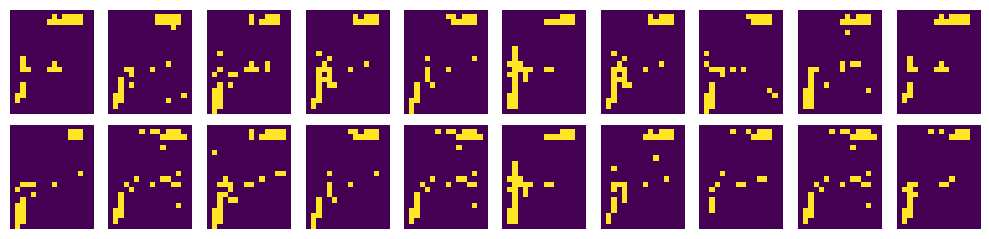

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

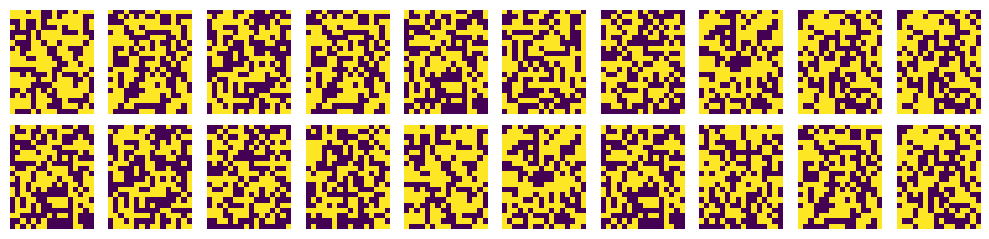

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

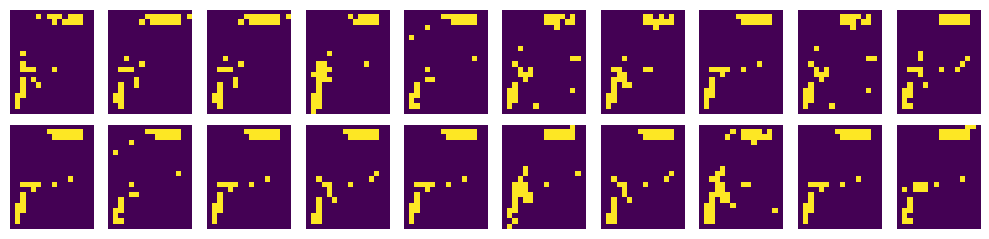

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

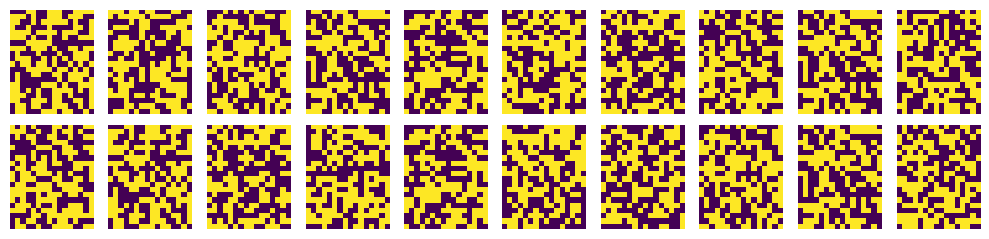

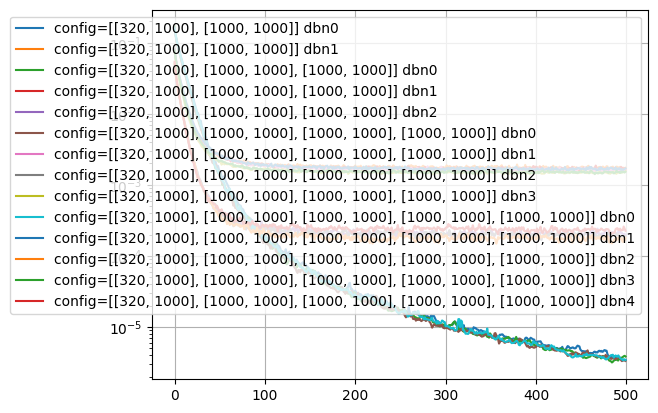

In [17]:
experiment_DBN(*LISTE_2, n_neurons=1000)

('A', 'F', 'Y', '9')


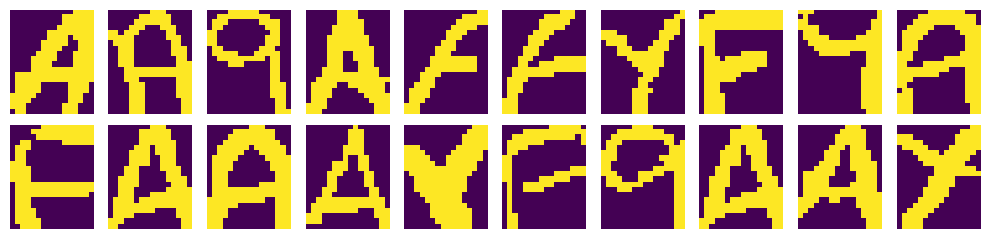

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

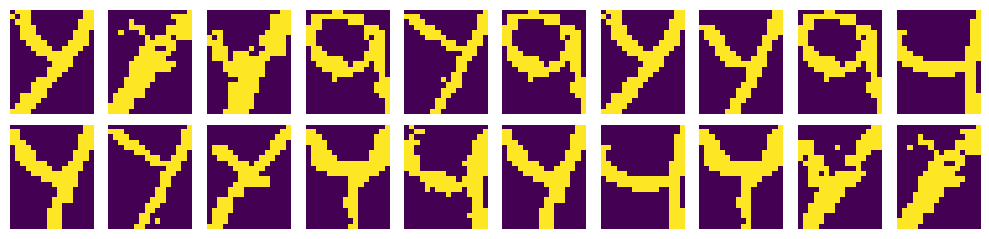

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

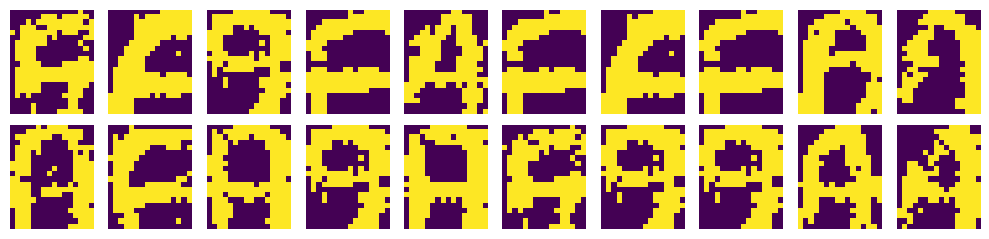

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

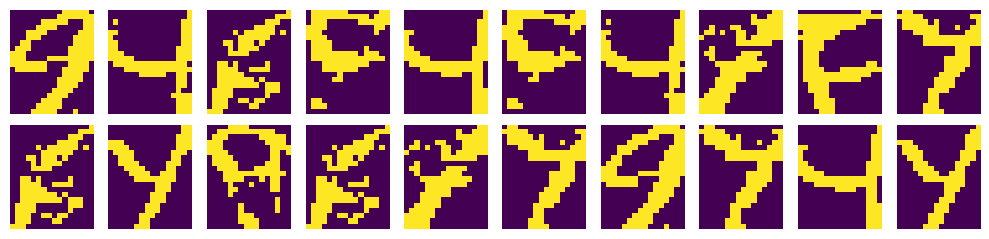

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

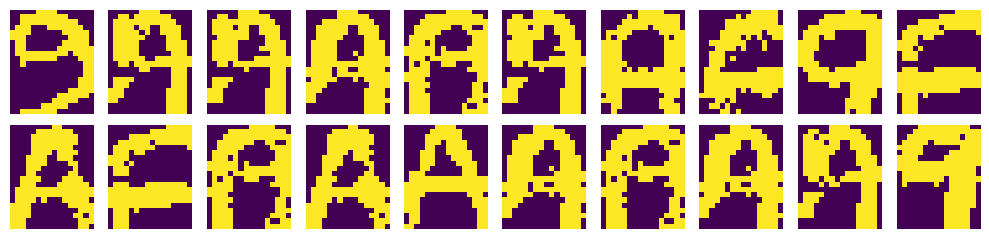

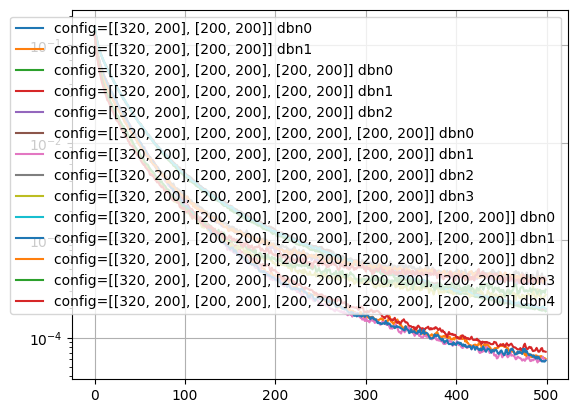

In [18]:
experiment_DBN(*LISTE_4, n_neurons=200)

('A', 'F', 'Y', '9')


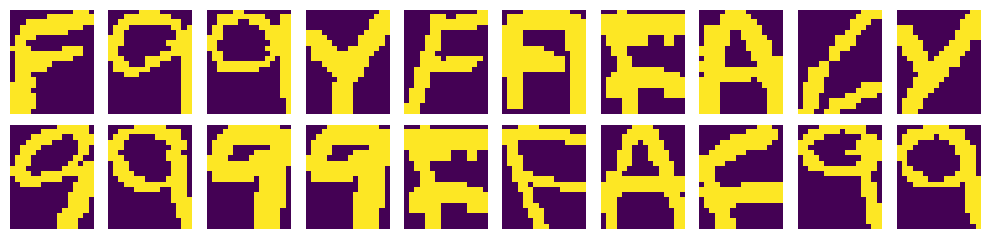

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

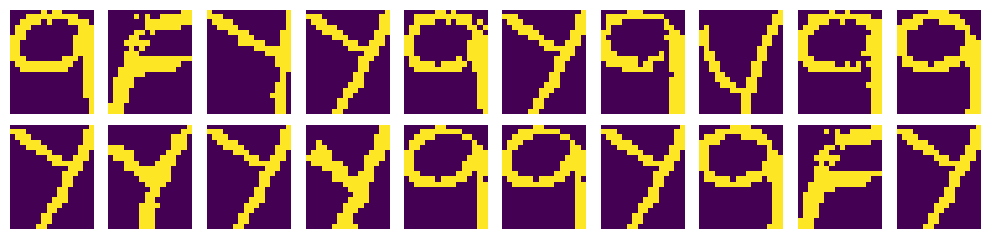

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

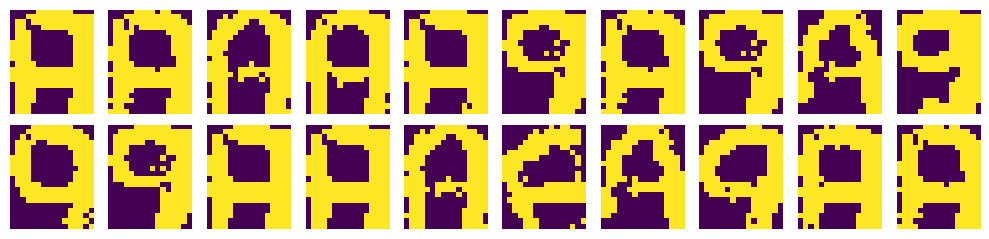

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

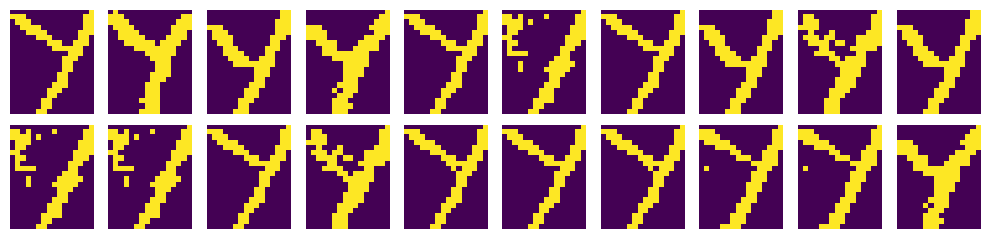

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

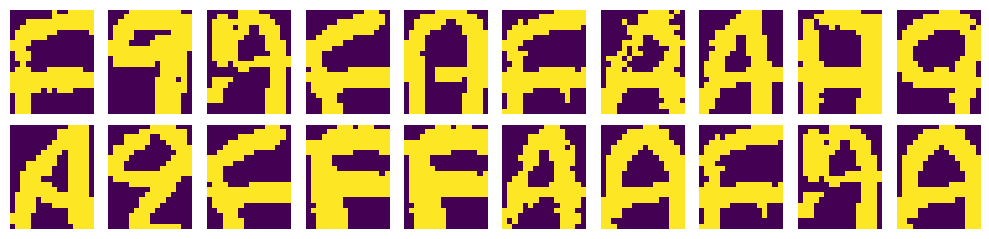

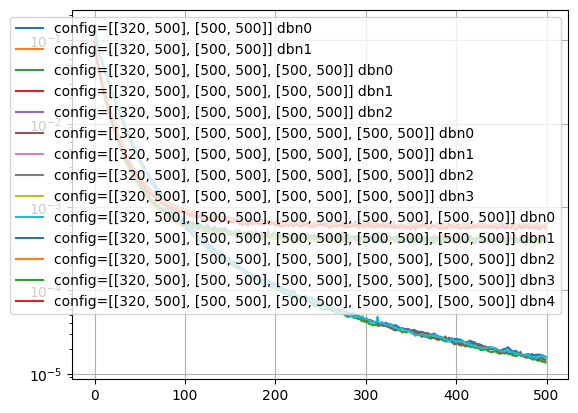

In [19]:
experiment_DBN(*LISTE_4, n_neurons=500)

('A', 'F', 'Y', '9', 'D', '4')


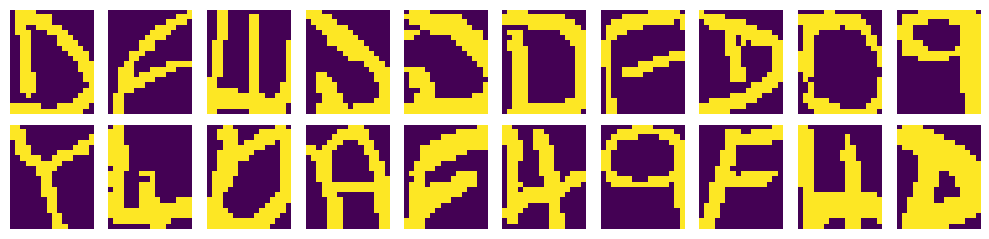

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

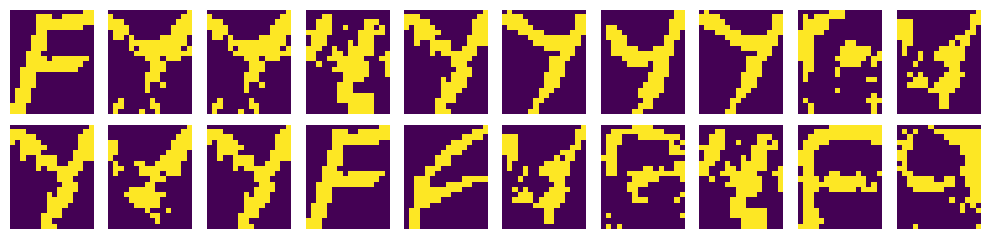

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

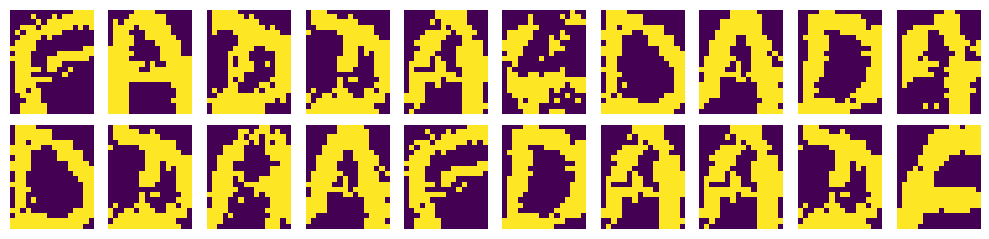

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

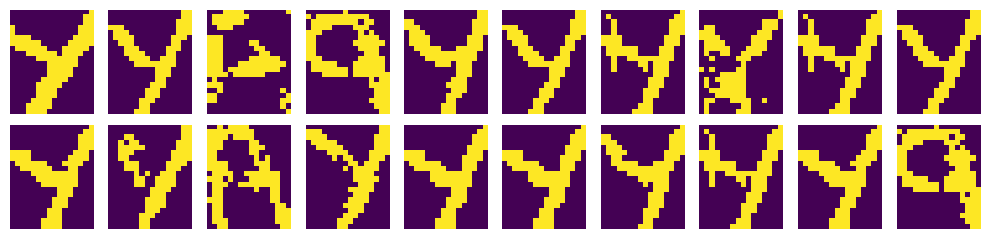

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

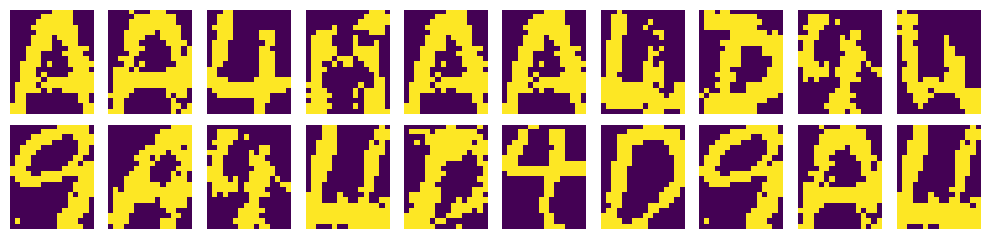

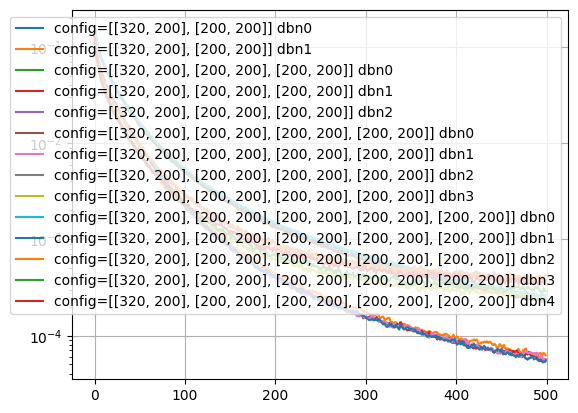

In [21]:
experiment_DBN(*LISTE_6, n_neurons=200)

('A', 'F', 'Y', '9', 'D', '4')


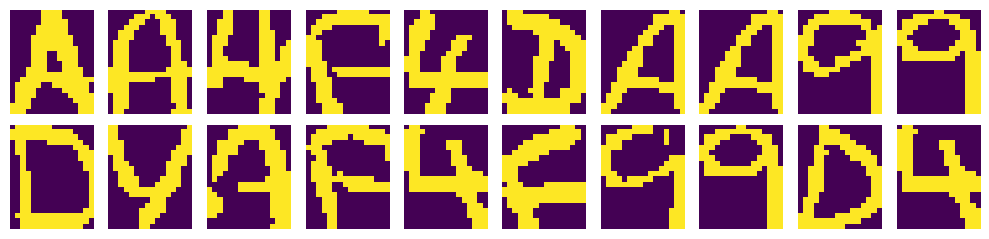

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

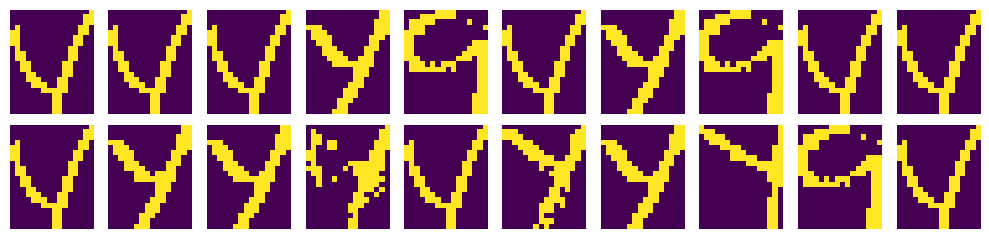

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

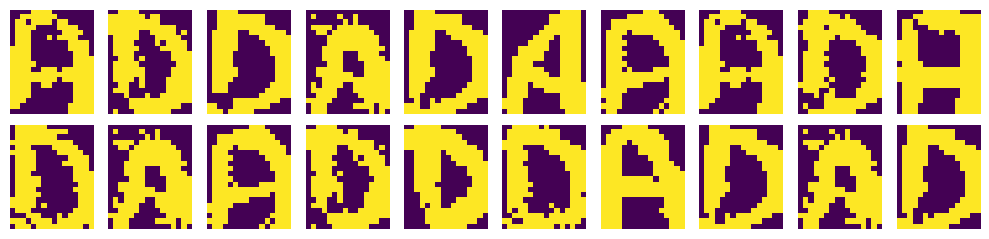

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

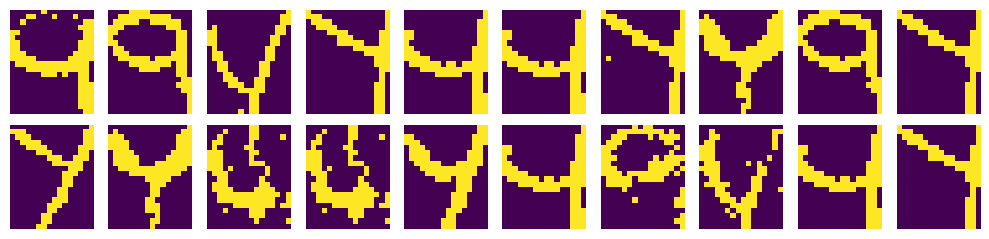

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

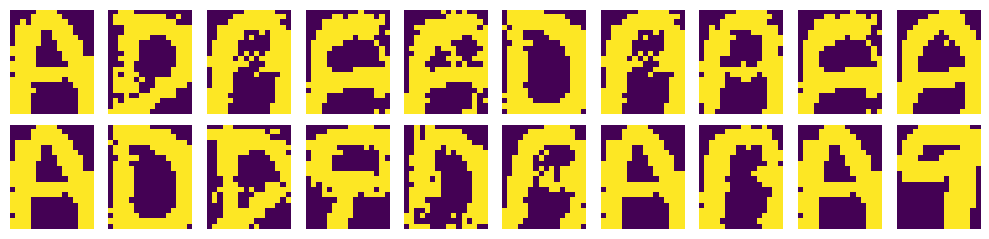

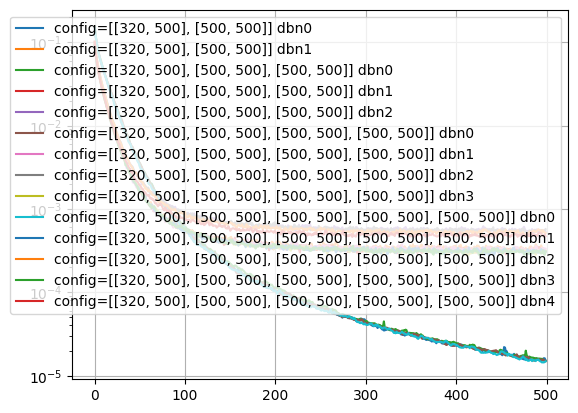

In [22]:
experiment_DBN(*LISTE_6, n_neurons=500)